# Netflix Data Analysis

## Importing Data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

In this step i need to be clear about what we'll need analysed
- The following analysis going to be about movies and TV Shows
- I don't need show_id, description, listed_in, director, cast columns
- I will handle all NaN values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### First Part of Data Cleaning
- i'll clean the whole data frame

In [47]:
df = df.drop(columns=['show_id','description','listed_in','cast'])

In [48]:
df[df['rating'].isin(['74 min','84 min','66 min'])]

,type,title,director,country,date_added,release_year,rating,duration
5541,Movie,Louis C.K. 2017,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN


In [49]:
df = df.dropna(subset=['rating', 'duration', 'date_added'])

In [50]:
df['title'].drop_duplicates()

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8790, dtype: object

In [51]:
df['duration'] = df['duration'].str.split(' ').str[0].astype('int64')

In [52]:
df['date_added'] = df['date_added'].str.split(', ').str[-1].astype('int64')

In [53]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [54]:
df = df[~df['rating'].isin(['NR','UR'])]

In [55]:
rating_to_number = {
    "TV-Y": 2, "TV-Y7": 7, "TV-Y7-FV": 7, "TV-G": 0,
    "G": 0, "PG": 10, "PG-13": 13, "TV-PG": 10,
    "TV-14": 14, "TV-MA": 17, "R": 17, "NC-17": 18
}

df["rating_num"] = df["rating"].map(rating_to_number)
df

,type,title,director,country,date_added,release_year,rating,duration,rating_num
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021,2020,PG-13,90,13
1,TV Show,Blood & Water,NaN,South Africa,2021,2021,TV-MA,2,17
2,TV Show,Ganglands,Julien Leclercq,NaN,2021,2021,TV-MA,1,17
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,2021,TV-MA,1,17
4,TV Show,Kota Factory,NaN,India,2021,2021,TV-MA,2,17
...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,United States,2019,2007,R,158,17
8803,TV Show,Zombie Dumb,NaN,NaN,2019,2018,TV-Y7,2,7
8804,Movie,Zombieland,Ruben Fleischer,United States,2019,2009,R,88,17
8805,Movie,Zoom,Peter Hewitt,United States,2020,2006,PG,88,10


### Second Part of Data Cleaning

In [56]:
movies_df = df[df['type'] == 'Movie'].reset_index(drop=True)
tvshows_df = df[df['type'] == 'TV Show'].reset_index(drop=True)

In [57]:
tvshows_df = tvshows_df.drop(columns='type')
movies_df = movies_df.drop(columns='type')

In [58]:
tvshows_df.rename(columns={'duration':'seasons'},inplace=True)
movies_df.rename(columns={'duration':'duration_min'}, inplace=True)

## Exploratory Data

In [59]:
movies_df.describe(include='all')

,title,director,country,date_added,release_year,rating,duration_min,rating_num
count,6048,5861,5609,6048.000000,6048.000000,6048,6048.00000,6048.000000
unique,6048,4293,641,NaN,NaN,12,NaN,NaN
top,Wolves,Rajiv Chilaka,United States,NaN,NaN,TV-MA,NaN,NaN
freq,1,19,2021,NaN,NaN,2062,NaN,NaN
mean,NaN,NaN,NaN,2018.879960,2013.154927,NaN,99.64418,13.979001
std,NaN,NaN,NaN,1.541169,9.656579,NaN,28.38919,4.028802
min,NaN,NaN,NaN,2008.000000,1942.000000,NaN,3.00000,0.000000
25%,NaN,NaN,NaN,2018.000000,2012.000000,NaN,87.00000,13.000000
50%,NaN,NaN,NaN,2019.000000,2016.000000,NaN,98.00000,14.000000
75%,NaN,NaN,NaN,2020.000000,2018.000000,NaN,115.00000,17.000000


In [61]:
movies_df[['release_year','date_added','duration_min','rating_num']].corr()

,release_year,date_added,duration_min,rating_num
release_year,1.000000,0.036674,-0.209317,0.058552
date_added,0.036674,1.000000,0.121807,-0.026827
duration_min,-0.209317,0.121807,1.000000,0.226762
rating_num,0.058552,-0.026827,0.226762,1.000000


In [62]:
tvshows_df.describe(include='all')

,title,director,country,date_added,release_year,rating,seasons,rating_num
count,2660,230,2270,2660.000000,2660.000000,2660,2660.000000,2660.000000
unique,2660,222,196,NaN,NaN,8,NaN,NaN
top,Zombie Dumb,Alastair Fothergill,United States,NaN,NaN,TV-MA,NaN,NaN
freq,1,3,753,NaN,NaN,1143,NaN,NaN
mean,NaN,NaN,NaN,2018.929699,2016.636466,NaN,1.752256,13.011278
std,NaN,NaN,NaN,1.596566,5.732978,NaN,1.551393,4.982846
min,NaN,NaN,NaN,2008.000000,1925.000000,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,2018.000000,2016.000000,NaN,1.000000,10.000000
50%,NaN,NaN,NaN,2019.000000,2018.000000,NaN,1.000000,14.000000
75%,NaN,NaN,NaN,2020.000000,2020.000000,NaN,2.000000,17.000000


In [63]:
tvshows_df[['release_year','date_added','seasons','rating_num']].corr()

,release_year,date_added,seasons,rating_num
release_year,1.000000,0.387337,-0.082140,0.120802
date_added,0.387337,1.000000,0.041249,0.036028
seasons,-0.082140,0.041249,1.000000,-0.038315
rating_num,0.120802,0.036028,-0.038315,1.000000


## Data Visualization

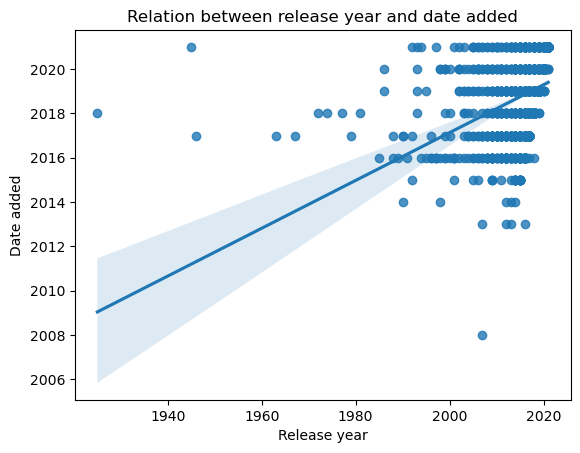

In [71]:
visualization_1 = sns.regplot(x='release_year',y='date_added', data=tvshows_df)
visualization_1.set_title('Relation between release year and date added')
visualization_1.set_ylabel('Date added')
visualization_1.set_xlabel('Release year')
plt.show()

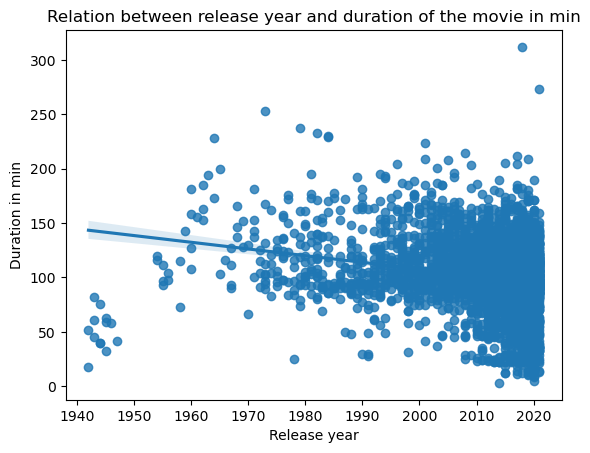

In [73]:
visualization_2 = sns.regplot(x='release_year',y='duration_min', data=movies_df)
visualization_2.set_title('Relation between release year and duration of the movie in min')
visualization_2.set_ylabel('Duration in min')
visualization_2.set_xlabel('Release year')
plt.show()